![AltText](http://www.scdn.co/i/_global/open-graph-default.png "Spotify Logo")


# Introduction and Motivations


## Proposal

To introduce the subject material and understand the motivations behind this study, we first recall our original project proposal:
>As people who are like music and have received some form of musical training, we decided to do our data science topic on songs.  A look at the Spotify data obtained in Kaggle has shown lists of top ranking songs, some song classifications, and some attributes that are known as "audio analyses."  Metrics such as "danceability" and "energy" are given quantitative values and are available through Spotify's API.  We intend to use this data as a data lake for our experiments in order to find out what Spotify looks for in a hit.  

>We'd like to answer questions such as "Given today's trends, what does it take to make it to Spotify's top 50 songs?"  and "What's more important for streaming numbers today, instrumentalness or danceability?"  We add the qualifier for the present because at the moment we do not have access to such ranking data from 2016 or earlier.

## Defining the Question




As outlined in the proposal, we'd like to find out what makes up a Spotify hit.  Which of the audio features are the most important?  What gets more listens - vocals-based music like rap or instrumentals like EDM?  The potential significance of such questions are at least two-fold: 

1. To dvelop some sort of model that could determine if a song's characteristics are enough to be a Spotify chart-topper
2. If enough data can be collected, to perhaps even correlate song popularity with production techniques. For example Max Martin is a producer who's considered to have a "magic touch" - he has produced or co-written 22 Billboard Hot 100 **CHART TOPPERS**.  It would be interesting to find out what are his secrets to success.

More info on Max Martin from infowetrust.com: 

![AltText](https://i1.wp.com/infowetrust.com/wp-content/uploads/2015/11/Who-is-Max-Martin-03.png?w=2100 "Who is Max Martin?")  ![AltText](https://www.independent.ie/opinion/article31413539.ece/ALTERNATES/h342/2015-08-01_opi_11500704_I2.JPG "What's he hiding?")

# Other Works

    Many others have also tried to define or predict what makes a song a hit. These works look at a lot of the same metrics that we analyze including danceability, energy, etc…
    
    Nicholas Borg and George Hokkanen attempt to do so in an interesting manner. Support Vector Machines trained on Youtube songs and view counts performed quire poorly so rather than come up with a general predictor, they decided to tackle only a subset of genres, ten to be specific. Their data came from a dataset of features for 10000 songs which they mapped to view counts by using the Youtube API and getting the view count for the first link came up. They did not find any meaningful correlation coefficients when mapping song features to view counts. For temporal features they used a Support Vector with a string kernel. An example of a temporal feature would be spectral data. They made a similar conclusion to others in that using audio features alone would not be sufficient for detecting a hit. They spoke of the unpredictability of social markets which is in part responsible for why something is popular.
    
    Another team of researchers, led by Tijl De Bie, artificial intelligence lecturer at the University of Bristol in England, also attempted to tackle this problem. With over fifty years of top song data for Britain, they were able to create a model for predicting hit songs. With their large amount of data, they were able to take a different approach. For example, when deciding if a song made today would be a hit, hit songs, from the 2000’s would be weighed more heavily. With this, they compare the input song to hits and flops from different decades and make a decision based on its similarity with past data. They had 23 feature points included loudness, danceability, etc…. One conclusion I found interesting from their findings was that danceability did not really affect a songs performance until the 70’s. They also found loudness to be steadily increasing throughout the years. To further improve their algorithm, they look to analyze mood as well.
    
    Researchers have spent a lot of time digging into what makes people like or dislike a certain song. One experiment conducted put teens into two groups and had them rate songs. The control group saw the songs in a list with no bias towards any songs. While the other group saw the same list, but with a number of likes/dislikes for a song. They found that popular songs stayed popular and likewise for unpopular songs. Whereas, in the control group they found the ratings did not correlate with what was marked as popular/unpopular in the other group. This shows that the market certainly plays a role in our decision which makes predicting a hit that much harder.
    Musicologist Dr. Alison Pawley and Psychologist Dr. Daniel Mullensiefen, of the University of London, claimed that popularity could be determined from lyrics. This may very well be the case, considering we did not find any instrumental songs in our top song data. They examined lyrical traits such as vocal phrases, male vocals, and number of pitches.
    
    One things to take away from all of these efforts is that there are many different ways to approach this question, all of which have merit. Considering how many external factors affect our decision on why a song is good, it will be a long time before any song predictor can achieve great performance. At the very least, it is interesting to see the difference in popular songs throughout time and how they relate.
    

# Methods and Tools

## Getting the Data

![AltText](https://kaggle2.blob.core.windows.net/competitions/kaggle/3136/media/kaggle-transparent.svg "Kaggle Logo")

For the unfamiliar, Spotify is a digital music, podcast, and video streaming service that provides access to more than 30 million songs.  Spotify's Charts rank songs by the number of streams - we obtained the top 100 songs of 2017 to conduct our analysis.  The dataset is available here: https://www.kaggle.com/nadintamer/top-tracks-of-2017/downloads/featuresdf.csv/1 





## Analysis and Visualization
We will use the IPython environment to conduct our analysis, and our results will be reported in this notebook.  We start by setting up our notebook with the Pandas, Seaborn,and matplotlib libraries.  


In [2]:
%matplotlib inline

import sklearn as skl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns





We then read our csv data into a dataframe.  The dataset contains other information beyond the name of the songs and its ranking, as shown below.  We also check that the dataset is complete and void of duplicates.  Fortunately, our starting data is clean.

In [3]:
sdata = pd.read_csv('./featuresdf.csv')
sdata['rank'] = sdata.index +1

sdata.head(8)


,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,rank
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.931,95.977,233713.0,4.0,1
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229000,0.000000,0.0924,0.813,88.931,228827.0,4.0,2
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.846,177.833,228200.0,4.0,3
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.049800,0.000014,0.1640,0.446,103.019,247160.0,4.0,4
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.055200,0.000000,0.1670,0.811,80.924,288600.0,4.0,5
5,7KXjTSCq5nL1LoYtL7XAw,HUMBLE.,Kendrick Lamar,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.400,150.020,177000.0,4.0,6
6,3eR23VReFzcdmS7TYCrhC,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533,0.0,-6.596,1.0,0.0706,0.119000,0.000000,0.0864,0.515,99.968,220781.0,4.0,7
7,3B54sVLJ402zGa6Xm4YGN,Unforgettable,French Montana,0.726,0.769,6.0,-5.043,1.0,0.1230,0.029300,0.010100,0.1040,0.733,97.985,233902.0,4.0,8


In [4]:
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
rank                100 non-null int64
dtypes: float64(13), int64(1), object(3)
memory usage: 13.4+ KB


In [5]:
#check for duplicates
len(sdata[sdata.duplicated() == True])


0

## The Data Fields
We now examine the fields within the data set.  The first 3 fields are arranged as follows:
+ **id**: 
    + Spotify URI
+ **name**: 
    + title
+ **artists**: 
    + contributing artists


The following fields are song attributes or audio features that are provided by Spotify via the Spotify API (descriptions taken from https://beta.developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/):
+ **danceability**: 
    + describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. 
    + value of 0.0 is least danceable and 1.0 is most danceable.
+ **energy**: 
    + measure from 0.0 to 1.0 which represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. 
    + perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
+ **key**: 
   + the key the track is in. 
   + integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
+ **loudness**:  
   + overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. 
   + values typical range between -60 and 0 db.
+ **mode**: 
    + indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. 
    + major is represented by 1 and minor is 0.
+ **speechiness**:  
    + detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. 
    + values above 0.66 describe tracks that are probably made entirely of spoken words. 
    + values between 0.33 and 0.66 describe tracks that may contain both music and speech. 
    + values below 0.33 most likely represent music and other non-speech-like tracks.
+ **acousticness**: 
    + confidence measure from 0.0 to 1.0 of whether the track is acoustic. 
    + 1.0 represents high confidence the track is acoustic.
+ **instrumentalness**: 
    + predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. 
    + values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
+ **liveness**: 
    + detects the presence of an audience in the recording. 
    + value above 0.8 provides strong likelihood that the track is live.
+ **valence**: 
    + measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
+ **tempo**:  
    + overall estimated tempo of a track in beats per minute (BPM). 
    + derives directly from the average beat duration.
+ **duration_ms**: 
    + duration of the track in milliseconds.
+ **time_signature**: 
    + estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

# Preliminary Analysis

To get a general feel of what the data distribution is for our dataset, we first plot each column as a histogram. 

## Histograms

To construct the histograms, we first divide the range of values into "bins," or intervals.  The bin size is first determined using Sturge's rule: 

$$k = 1 + 3.322 * \log_{10}{n}$$

where k is the number of classes and n is the number of total observations (which is 100 in this case).



/Users/bigolu/.pyenv/versions/3.6.4/envs/cs439/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


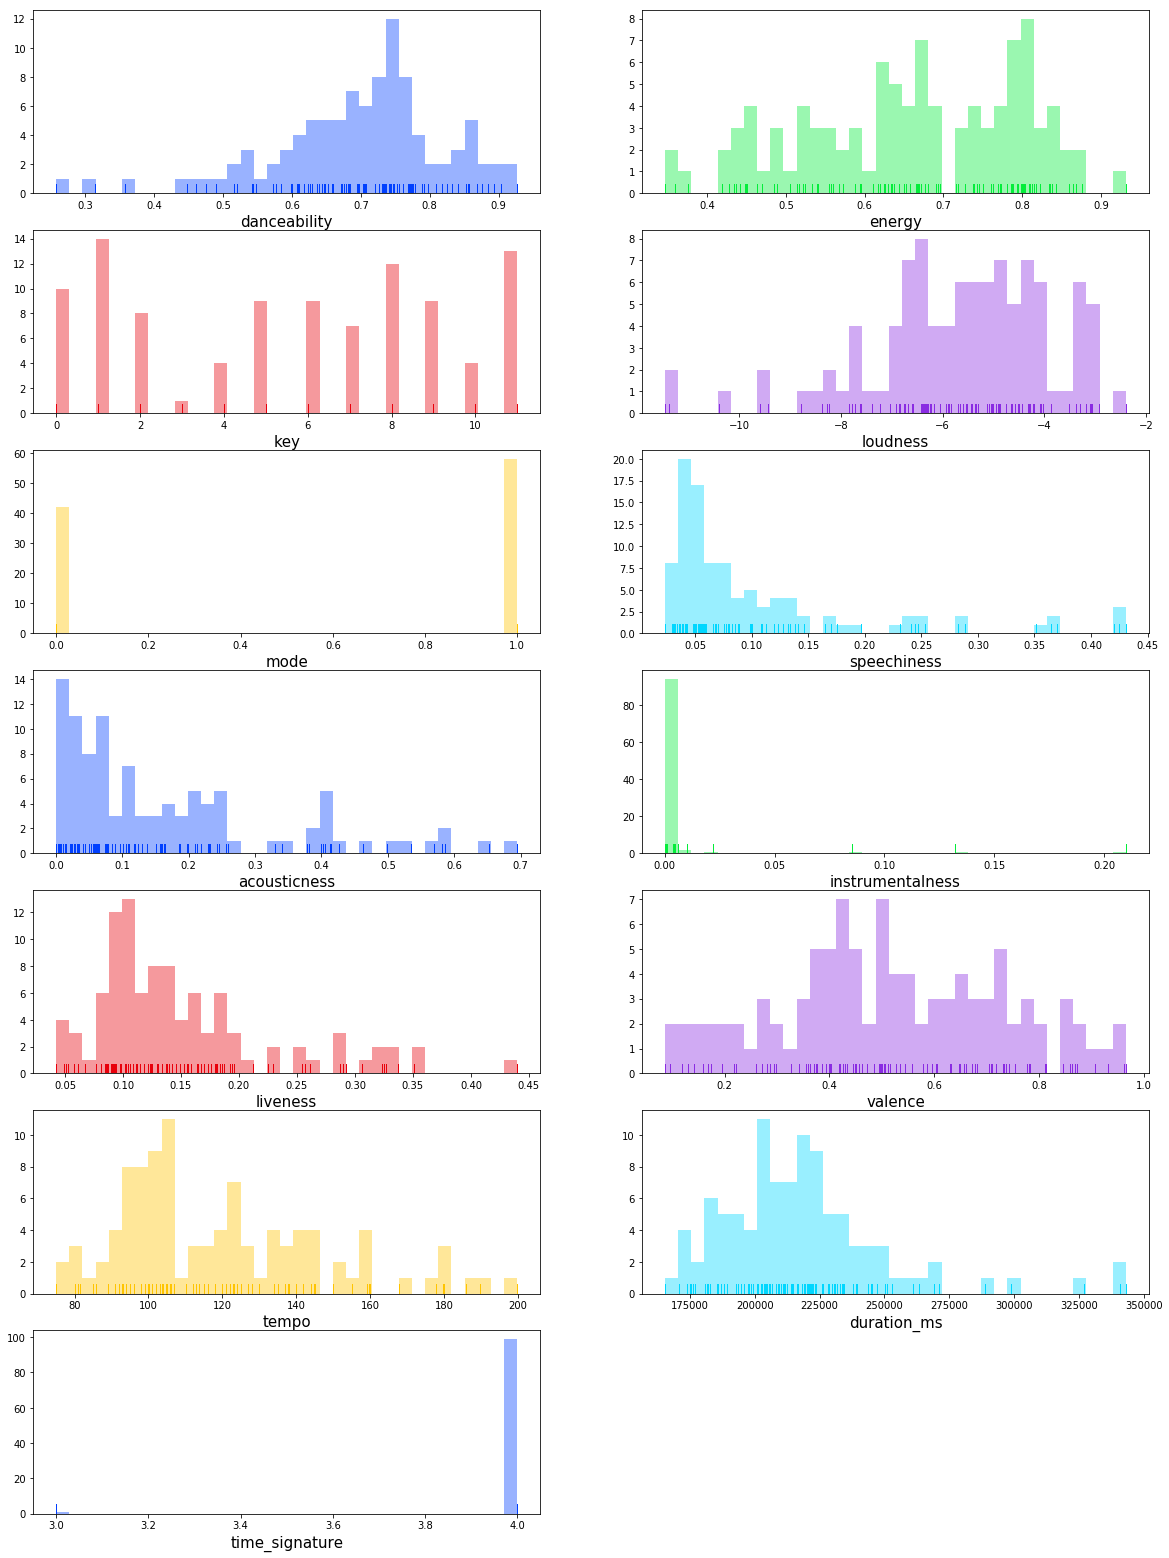

In [6]:
# Distplot each of the song attributes

fig1_1 = plt.figure(figsize = (20, 56))

pal = sns.color_palette("bright", 13)

for num in range(1, 14):
    plt.subplot(14, 2, num)
    a = sns.distplot(sdata[list(sdata)[num + 2]], bins= 35, color = pal[num -1], rug = True, kde = False)
    a.set_xlabel(list(sdata)[num+2], fontsize = 15)
   




First thoughts on examining the data representation:
+ Popular songs have a 4/4 time signature
+ Popular songs have vocals
+ There is a rough 40/60 split between the tracks that use a minor key and the tracks that use a major key - one does category does not dominate the other
We realize that  it is better to know the modality and the key of a track together as a distinct data point.  Hence, we introduce a new category of **keyscore** through a simple formula: 

$$keyscore = key + 0.5*mode$$

In addition, we notice that loudness scores are negative numbers.  This can can result in a false negative correlation.   The loudness of the tracks are calculated using:

$$loudness = 10\log_{10}{\frac{P_2}{P_1}}$$

Where $P_2$ is the average sound pressure of the track and $P_1$ is the highest sound pressure value reached by the track.  We change the sign by using:

$$power\_ratio = 10^{loudness/10}$$

/Users/bigolu/.pyenv/versions/3.6.4/envs/cs439/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


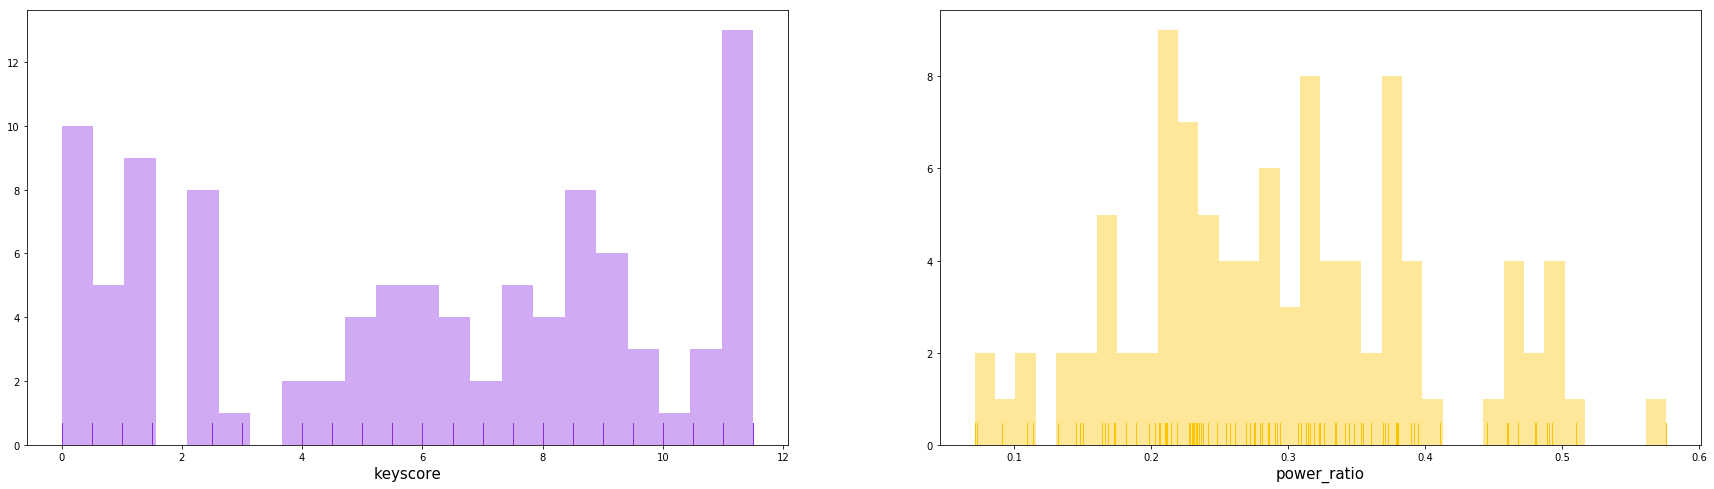

In [7]:
fig1_2 = plt.figure(figsize = (30, 8))


sdata['keyscore'] = sdata['key'] + 0.5 * sdata['mode']
sdata['power_ratio'] = 10 ** (sdata['loudness'] / 10) 
ks = fig1_2.add_subplot(1,2,1)

ks.set_xlabel('keyscore', fontsize = 15)

ks = sns.distplot(sdata['keyscore'], bins=22, #22 keys + mode pairs
                 color = pal[3], rug = True, kde = False)

pr = fig1_2.add_subplot(1, 2, 2)

pr.set_xlabel('power_ratio', fontsize =15)

pr = sns.distplot(sdata['power_ratio'], bins = 34, 
                 color = pal[4], rug = True, kde = False)




# Examining Correlations


From the knowledge gained above, we render time_signature, instrumentalness, key, and mode as relatively irrelevant variables.  With the addition of the keyscore metric, there are now 10 different dimensions to examine, with only 100 data points.  It is beneficial to reduce data dimensionality in order to restrict analysis to the most relevant features.  We use a heatmap to investigate how strongly data columns correlate with each other.

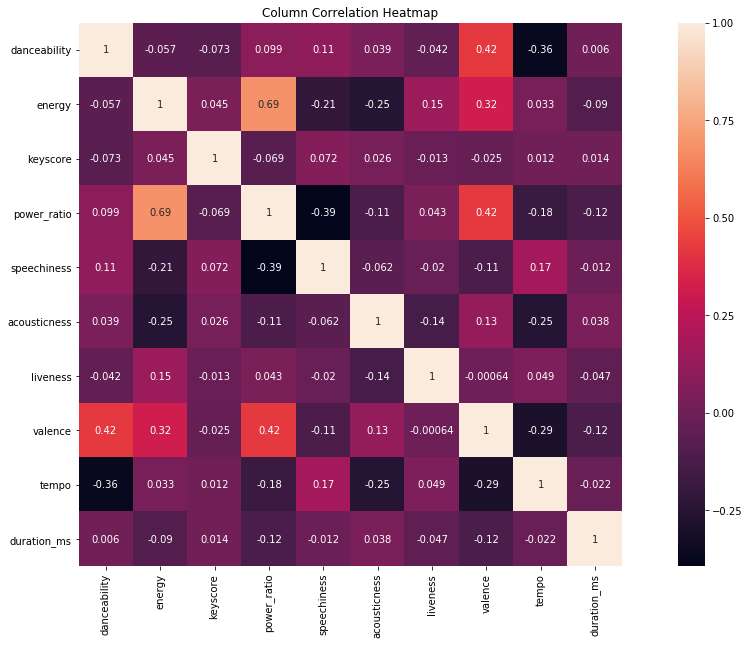

In [8]:
relevant = ["danceability", "energy", "keyscore", "power_ratio", "speechiness", "acousticness", "liveness", "valence", "tempo", "duration_ms"]

heatmapdf = sdata[relevant].copy()

correlation = heatmapdf.corr()
plt.figure(figsize=(20,10))
plt.title('Column Correlation Heatmap')

sns.heatmap(correlation, vmax=1, square=True,annot=True)


## PCA 
The components do not demonstrate a lot of correlation.  Most of the variables are in fact negatively correlated, but there are four pairwise comparisons of note:
    1. power_ratio and energy
    2. valence and danceability
    3. valence and energy
    4. power_ratio and valence

Recall that our original goal is to come up with some model for determining what makes a song popular.  With the keyscore and power_ratio metrics, there are 10 dimensions to manage.  We may reduce the dimensionality through the use of PCA and visualize any clustering with t-SNE.  However, just by our cursory pair-wise comparisions, we already know what the four most relevant variables are.  We compare conducting PCA across all 10 dimensions versus conducting PCA across power_ratio, energy, valence, and danceability only. 

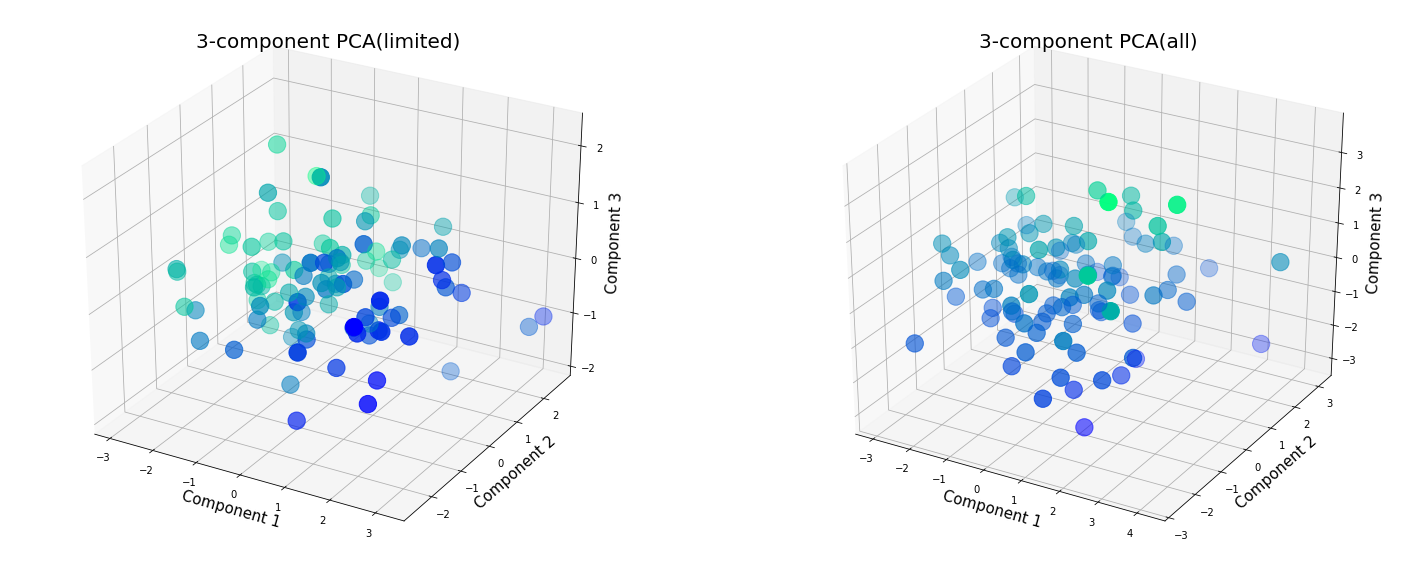

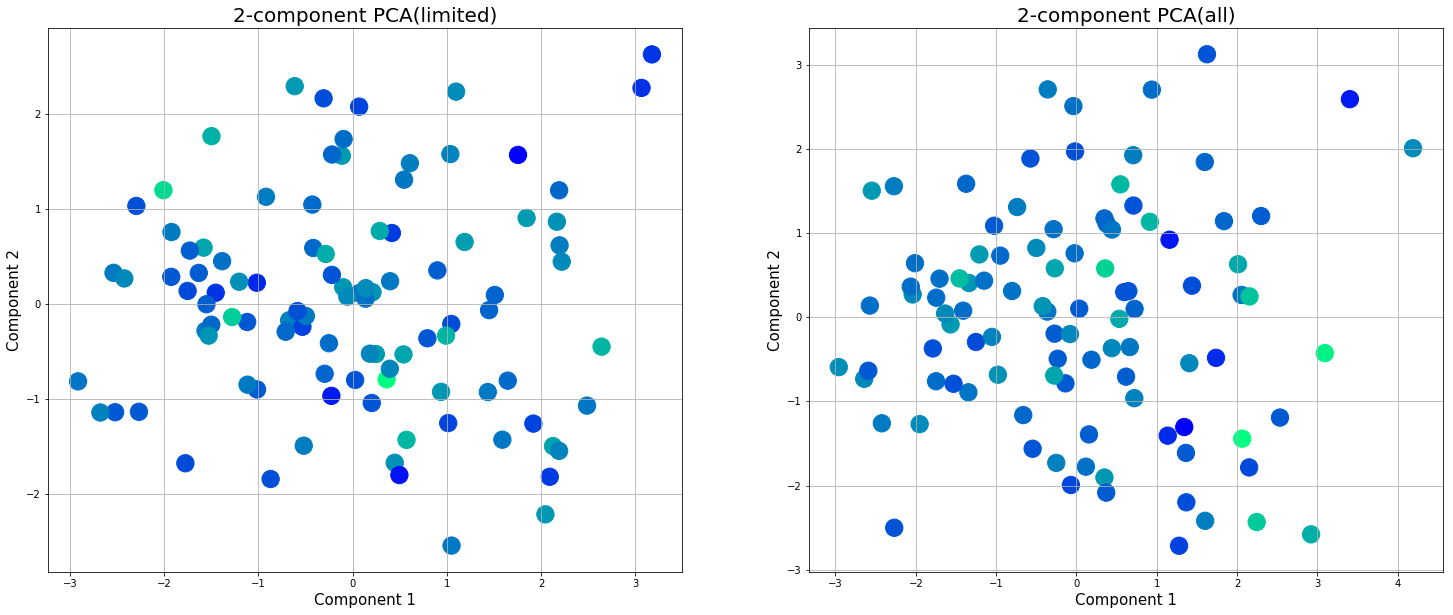

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D





relevant = ["danceability", "energy", "power_ratio", "valence"]
entries = sdata["energy"]

#must standardize
x = sdata.loc[:, relevant].values
x = StandardScaler().fit_transform(x)

#pca
songpca = PCA(n_components=3)
songpca.fit(x)
components = songpca.transform(x)


pca_df = pd.DataFrame(data = components)

pca_df = pd.concat([pca_df, entries], axis = 1)
pca_df.columns = ['pca1', 'pca2', 'pca3', 'energy']
                        
#visualize
fig2_1 = plt.figure(figsize = (25,10))
a =  fig2_1.add_subplot(1,2,1, projection = '3d')
#a = Axes3D(fig2_1.add_subplot(1,2,1))
a.scatter(pca_df['pca1'], pca_df['pca2'], pca_df['pca3'], c=pca_df["energy"], cmap=plt.cm.winter, s = 300)

a.set_xlabel('Component 1', fontsize = 15)
a.set_ylabel('Component 2', fontsize = 15)
a.set_zlabel('Component 3', fontsize = 15)

a.set_title('3-component PCA(limited)', fontsize = 20)


a.grid()


fig2_2 = plt.figure(figsize = (25,10))

b = fig2_2.add_subplot(1,2,1)

b.scatter(pca_df['pca1'], pca_df['pca2'], c=pca_df["pca3"], cmap=plt.cm.winter , s = 300)

b.set_xlabel('Component 1', fontsize = 15)
b.set_ylabel('Component 2', fontsize = 15)

b.set_title('2-component PCA(limited)', fontsize = 20)


b.grid()


notallrelevant = ["danceability", "energy", "keyscore", "power_ratio", "speechiness", "acousticness", "liveness", "valence", "tempo", "duration_ms"]
entries2 = sdata["energy"]

#must standardize
x = sdata.loc[:, notallrelevant].values
x = StandardScaler().fit_transform(x)

#pca
songpca2 = PCA(n_components=3)
songpca2.fit(x)
components2 = songpca2.transform(x)


pca_df2 = pd.DataFrame(data = components2)

pca_df2 = pd.concat([pca_df2, entries2], axis = 1)
pca_df2.columns = ['pca1', 'pca2', 'pca3', 'energy']
                        
#visualize
c =  fig2_1.add_subplot(1,2, 2, projection = '3d')
#a = Axes3D(fig2_1.add_subplot(1,2,1))
c.scatter(pca_df2['pca1'], pca_df2['pca2'], pca_df2['pca3'], c=pca_df2["pca3"], cmap=plt.cm.winter, s = 300)

c.set_xlabel('Component 1', fontsize = 15)
c.set_ylabel('Component 2', fontsize = 15)
c.set_zlabel('Component 3', fontsize = 15)

c.set_title('3-component PCA(all)', fontsize = 20)



c.grid()



d = fig2_2.add_subplot(1,2,2)

d.scatter(pca_df2['pca1'], pca_df2['pca2'], c=pca_df2["pca3"], cmap=plt.cm.winter, s = 300)

d.set_xlabel('Component 1', fontsize = 15)
d.set_ylabel('Component 2', fontsize = 15)

d.set_title('2-component PCA(all)', fontsize = 20)



d.grid()

Our comparisions are better seen by comparing explained variance ratios.  It is evident that a priori knowledge of correlated variables leads to more coherent summary results.  

In [10]:
print('variance ratios(limited): ' + str(songpca.explained_variance_ratio_))
print('total(limited): ' + str(sum(songpca.explained_variance_ratio_)))
print('variance ratios(all): ' + str(songpca2.explained_variance_ratio_))
print('total(all): ' + str(sum(songpca2.explained_variance_ratio_)))

variance ratios(limited): [0.50818568 0.30336555 0.11520664]
total(limited): 0.9267578749495853
variance ratios(all): [0.22989486 0.17033659 0.11685808]
total(all): 0.5170895369550347


## t-SNE

Conducting t-SNE dimension reduction on data also demonstrates differences in clustering.  Not only is there an observable difference in cluster size and order, there is also a distinct separation among the data points.  The color gradients imposed on the following graphs map to the energy levels of a given song, which is believed to be a strongly associated component with popularity.  

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.004s...
[t-SNE] Computed neighbors for 100 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.279653
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.092010
[t-SNE] Error after 475 iterations: 1.076878
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.002s...
[t-SNE] Computed neighbors for 100 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.147734
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.250175
[t-SNE] Error after 475 iterations: 0.789683


(-100, 100)

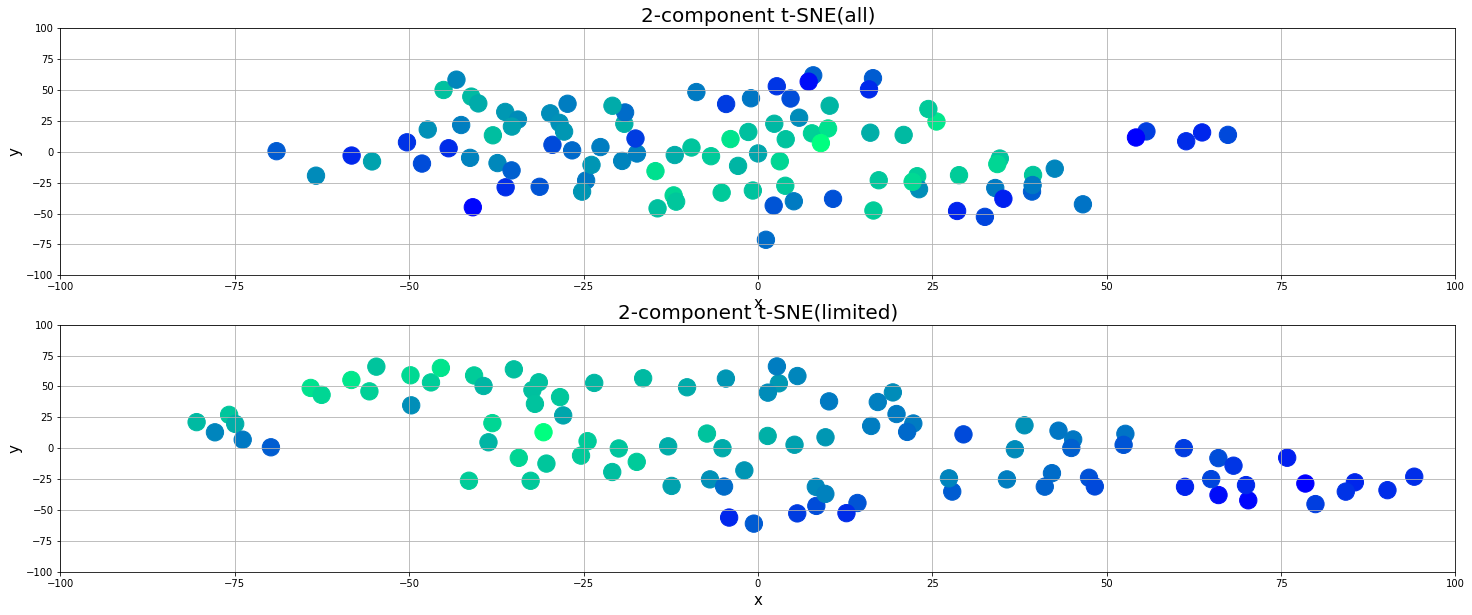

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

t_sne_all = ["danceability", "energy", "keyscore", "power_ratio", "speechiness", "acousticness", "liveness", "valence", "tempo", "duration_ms"]

X = sdata[t_sne_all].values
#standardize

mm_scaler = MinMaxScaler()
X = mm_scaler.fit_transform(X)

tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=475)
tsne_results = tsne.fit_transform(X)

fig3_1 = plt.figure(figsize = (25,10))

tp = fig3_1.add_subplot(2,1,1)

tp.scatter(tsne_results[:,0], tsne_results[:,1], c=sdata["energy"].values, cmap=plt.cm.winter , s = 300)
tp.set_xlabel('x', fontsize = 15)
tp.set_ylabel('y', fontsize = 15)

tp.set_title('2-component t-SNE(all)', fontsize = 20)
tp.grid()

axes = plt.gca()
axes.set_ylim([-100,100])
axes.set_xlim([-100, 100])


t_sne_relevant = ["danceability", "energy", "power_ratio", "valence"]
Y = sdata[t_sne_relevant].values
#standardize

mm_scaler = MinMaxScaler()
Y = mm_scaler.fit_transform(Y)

tsnel = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=475)
tsne_resultsl = tsnel.fit_transform(Y)

tpl = fig3_1.add_subplot(2,1,2)

tpl.scatter(tsne_resultsl[:,0], tsne_resultsl[:,1], c=sdata["energy"].values, cmap=plt.cm.winter , s = 300)
tpl.set_xlabel('x', fontsize = 15)
tpl.set_ylabel('y', fontsize = 15)

tpl.set_title('2-component t-SNE(limited)', fontsize = 20)
tpl.grid()

axesl = plt.gca()
axesl.set_ylim([-100,100])
axesl.set_xlim([-100, 100])



## Sanity Check



/Users/bigolu/.pyenv/versions/3.6.4/envs/cs439/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Text(0,0.5,'popularity (100 - rank)')

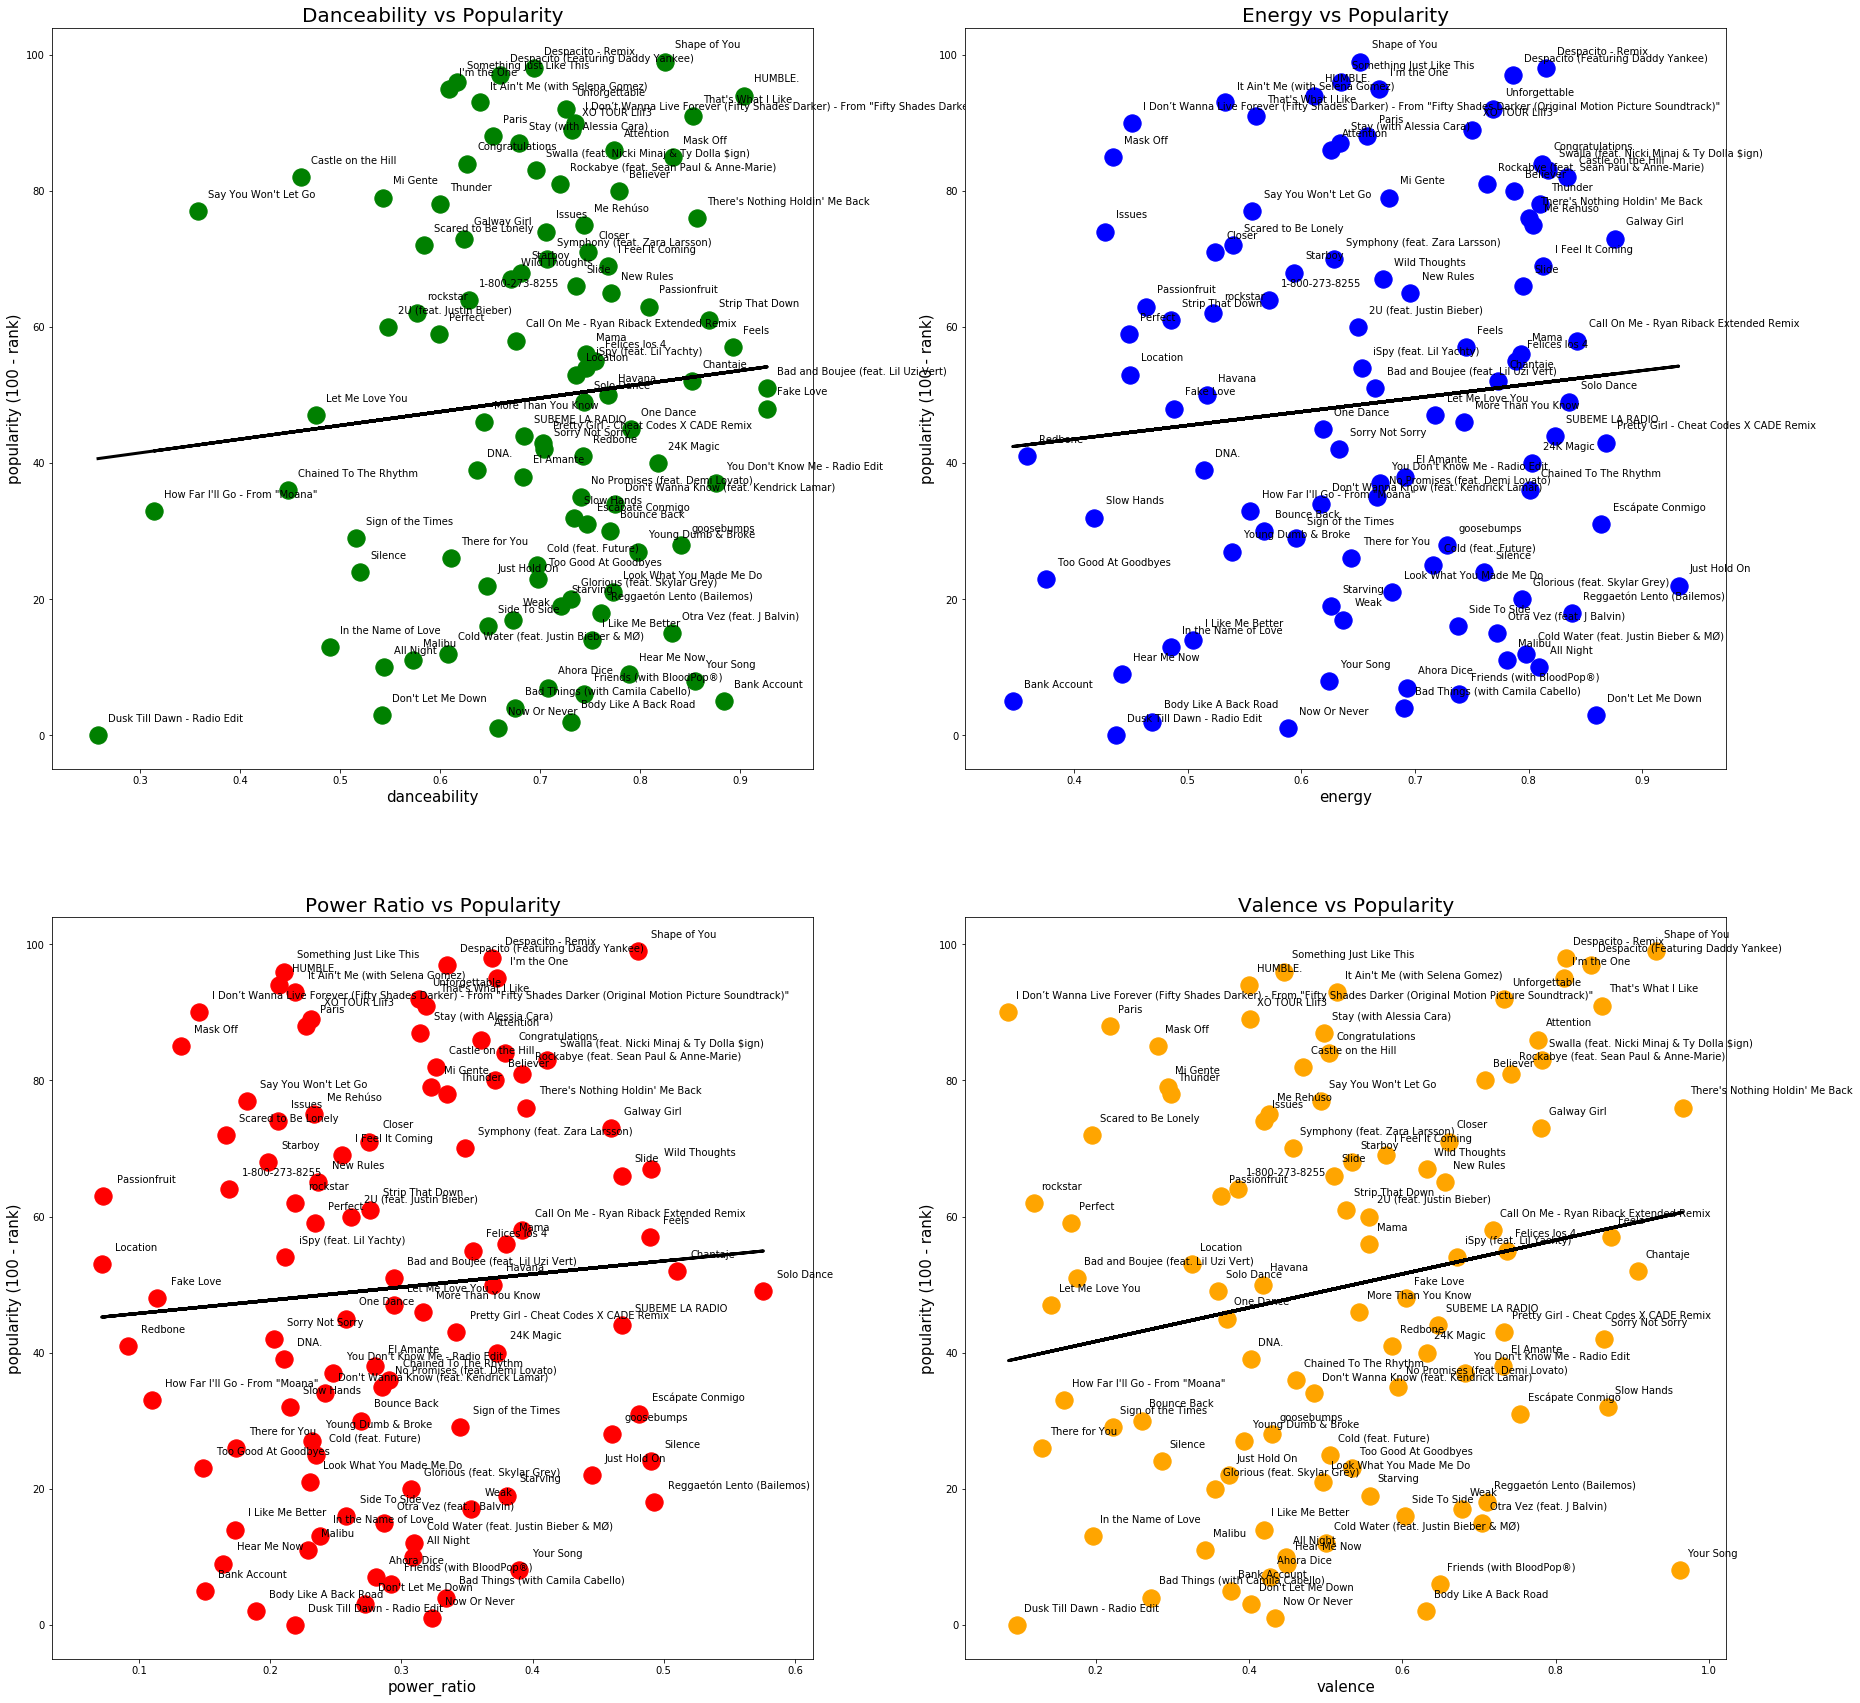

In [13]:
from sklearn import linear_model
fig4 = plt.figure(figsize = (30,30))
relevant = ["rank", "danceability", "energy", "power_ratio", "valence", "name"]


v = sdata[relevant].values

xd = sdata["danceability"].values
yd = 100 - sdata["rank"].values

#print(v)
dnc = fig4.add_subplot(2,2,1)


dnc.scatter(xd, yd, c = "green", s = 300)
for i, txt in enumerate(v[:, 5]):
    dnc.annotate(txt, (xd[i] + .01, 2 + yd[i]))
    

xd = xd.reshape(xd.shape[0], 1)
yd = yd.reshape(yd.shape[0], 1)

regrd = linear_model.LinearRegression()
regrd.fit(xd, yd)
dnc.plot(xd, regrd.predict(xd), color="black", linewidth=3)
dnc.set_title('Danceability vs Popularity', fontsize = 20)
dnc.set_xlabel('danceability', fontsize = 15)
dnc.set_ylabel('popularity (100 - rank)', fontsize = 15)

xe = sdata["energy"].values
ye = 100 - sdata["rank"].values

#print(v)
eng = fig4.add_subplot(2,2,2)


eng.scatter(xe, ye, c = "blue", s = 300)
for i, txt in enumerate(v[:, 5]):
    eng.annotate(txt, (xe[i] + .01, 2 + ye[i]))
    

xe = xe.reshape(xe.shape[0], 1)
ye = ye.reshape(ye.shape[0], 1)

regre = linear_model.LinearRegression()
regre.fit(xe, ye)
eng.plot(xe, regrd.predict(xe), color="black", linewidth=3)
eng.set_title('Energy vs Popularity', fontsize = 20)
eng.set_xlabel('energy', fontsize = 15)
eng.set_ylabel('popularity (100 - rank)', fontsize = 15)


xp = sdata["power_ratio"].values
yp = 100 - sdata["rank"].values

#print(v)
pwr = fig4.add_subplot(2,2,3)


pwr.scatter(xp, yp, c = "red", s = 300)
for i, txt in enumerate(v[:, 5]):
    pwr.annotate(txt, (xp[i] + .01, 2 + yp[i]))
    

xp = xp.reshape(xp.shape[0], 1)
yp = yp.reshape(yp.shape[0], 1)

regrp = linear_model.LinearRegression()
regrp.fit(xp, yp)
pwr.plot(xp, regrp.predict(xp), color="black", linewidth=3)
pwr.set_title('Power Ratio vs Popularity', fontsize = 20)
pwr.set_xlabel('power_ratio', fontsize = 15)
pwr.set_ylabel('popularity (100 - rank)', fontsize = 15)

xv = sdata["valence"].values
yv = 100 - sdata["rank"].values

#print(v)
val = fig4.add_subplot(2,2,4)


val.scatter(xv, yv, c = "orange", s = 300)
for i, txt in enumerate(v[:, 5]):
    val.annotate(txt, (xv[i] + .01, 2 + yv[i]))
    

xv = xv.reshape(xv.shape[0], 1)
yv = yv.reshape(yv.shape[0], 1)

regrv = linear_model.LinearRegression()
regrv.fit(xv, yv)
val.plot(xv, regrv.predict(xv), color="black", linewidth=3)
val.set_title('Valence vs Popularity', fontsize = 20)
val.set_xlabel('valence', fontsize = 15)
val.set_ylabel('popularity (100 - rank)', fontsize = 15)

In [21]:
from sklearn import tree
from sklearn.model_selection import train_test_split

def predict(features, labels):
    clf = tree.DecisionTreeClassifier()
    f_train, f_test, l_train, l_test = train_test_split(features, labels, test_size=.4, random_state=0)
    clf.fit(f_train, l_train)
    print('The score is {}'.format(clf.score(f_test, l_test)))
          
# gather features and labels
hits = sdata.as_matrix()
hits = [row[3:11] for row in hits]
lenhits = len(hits)
nothits = pd.read_csv('notpop.csv').as_matrix()
nothits = [row[3:11] for row in nothits]
lennothits = len(nothits)
hits.extend(nothits)
labels = [1] * lenhits
labels.extend([0] * lennothits)

predict(hits, labels)



[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The score is 0.6071428571428571


## Acknowledgements
Other Works
1. http://cs229.stanford.edu/proj2011/BorgHokkanen-WhatMakesForAHitPopSong.pdf
2. http://articles.latimes.com/2012/feb/03/science/la-sci-hit-songs-computer-20120204
3. https://www.livescience.com/7016-science-hit-songs.html
4. https://sites.psu.edu/siowfa15/2015/12/03/what-makes-a-song-a-hit/

Libraries
1. matplotlib
2. seaborn
3. scikit-learn
4. pandas

